In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv(r"C:\Users\91700\Desktop\final project\Partially Cleaned Salary Dataset (2).csv")
df.sample(6)

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
2636,2637,BOLD,Data Analyst,4,New Delhi,1151955.0
2228,2228,IQVIA,Data Analyst,2,Pune,671997.0
2542,2543,Cognizant Technology Solutions,Data Analyst,1,Hyderabad,616428.0
525,525,Lumen,Data Scientist,1,Bangalore,2903556.0
3322,3324,Nisum,Data Engineer,2,Hyderabad,1642294.0
1512,1512,Raja Software Labs,Data Scientist,1,Hyderabad,206332.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB


In [7]:
df.describe()

,Unnamed: 0,Salaries Reported,Salary
count,4339.000000,4339.000000,4.339000e+03
mean,2169.900899,2.777138,1.119885e+06
std,1253.742778,5.148095,4.300905e+06
min,0.000000,1.000000,1.081400e+04
25%,1084.500000,1.000000,4.199380e+05
50%,2169.000000,1.000000,7.062830e+05
75%,3255.500000,3.000000,1.196675e+06
max,4343.000000,105.000000,1.661404e+08


In [8]:
df.isna().sum()

Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.select_dtypes(include='int64')

,Unnamed: 0,Salaries Reported
0,0,105
1,1,95
2,2,66
3,3,40
4,4,32
...,...,...
4334,4339,1
4335,4340,1
4336,4341,1
4337,4342,1


In [11]:
df.select_dtypes(include='float64')

,Salary
0,648573.0
1,1191950.0
2,836874.0
3,669578.0
4,944110.0
...,...
4334,62160.0
4335,751286.0
4336,410952.0
4337,1612324.0


In [14]:
df.select_dtypes(include='object')

,company,job,area
0,Mu Sigma,Data Scientist,Bangalore
1,IBM,Data Scientist,Bangalore
2,Tata Consultancy Services,Data Scientist,Bangalore
3,Impact Analytics,Data Scientist,Bangalore
4,Accenture,Data Scientist,Bangalore
...,...,...,...
4334,TaiyōAI,Machine Learning Scientist,Mumbai
4335,Decimal Point Analytics,Machine Learning Developer,Mumbai
4336,MyWays,Machine Learning Developer,Mumbai
4337,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai


In [12]:
df[["Unnamed: 0","Company Name","Job Title","Salaries Reported","Location","Salary"]]
df.columns=["index","company","job","salary report","area","salary"]

In [13]:
df

,index,company,job,salary report,area,salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [15]:
d=df[["index","company","job","area","salary"]]
d

,index,company,job,area,salary
0,0,Mu Sigma,Data Scientist,Bangalore,648573.0
1,1,IBM,Data Scientist,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,Bangalore,669578.0
4,4,Accenture,Data Scientist,Bangalore,944110.0
...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,1612324.0


In [16]:
d.groupby('job').agg({'salary':['max','min','mean','sum']})

salary                           \
                                               max        min          mean   
job                                                                           
Associate Machine Learning Engineer   4.643720e+05   464372.0  4.643720e+05   
Data Analyst                          3.900962e+07    10814.0  6.164699e+05   
Data Engineer                         1.190400e+08    33120.0  1.309051e+06   
Data Science                          2.000000e+06    60840.0  3.649053e+05   
Data Science Associate                1.203913e+06  1203913.0  1.203913e+06   
Data Science Consultant               2.671464e+06  2671464.0  2.671464e+06   
Data Science Lead                     4.068310e+06  4068310.0  4.068310e+06   
Data Science Manager                  4.619021e+06  4619021.0  4.619021e+06   
Data Scientist                        1.661404e+08    48000.0  1.411330e+06   
Data Scientist - Trainee              6.105120e+05   610512.0  6.105120e+05   
Junior Data Scientist                 1.498750e+06    60840.0  5.963231e+05   
Lead Data Scientist                   2.839138e+06  1520967.0  1.852189e+06   
Machine Learning Associate            2.951140e+05   295114.0  2.951140e+05   
Machine Learning Consultant           1.226327e+06   186475.0  7.064010e+05   
Machine Learning Data Analyst         3.613780e+05   361378.0  3.613780e+05   
Machine Learning Data Associate       2.758410e+05   275841.0  2.758410e+05   
Machine Learning Data Associate I     2.585960e+05   258596.0  2.585960e+05   
Machine Learning Data Associate II    3.832130e+05   383213.0  3.832130e+05   
Machine Learning Developer            7.512860e+05   410952.0  5.811190e+05   
Machine Learning Engineer             6.518917e+06    21628.0  7.971884e+05   
Machine Learning Scientist            2.780760e+05    62160.0  1.701180e+05   
Machine Learning Software Engineer    1.397347e+06  1397347.0  1.397347e+06   
Senior Data Scientist                 3.654010e+06   324089.0  1.766130e+06   
Senior Machine Learning Engineer      3.110514e+06   229416.0  1.473436e+06   
Software Engineer - Machine Learning  1.612324e+06  1521236.0  1.566780e+06   

                                                    
                                               sum  
job                                                 
Associate Machine Learning Engineer   4.643720e+05  
Data Analyst                          6.090722e+08  
Data Engineer                         1.052477e+09  
Data Science                          1.569093e+07  
Data Science Associate                1.203913e+06  
Data Science Consultant               2.671464e+06  
Data Science Lead                     4.068310e+06  
Data Science Manager                  4.619021e+06  
Data Scientist                        2.602493e+09  
Data Scientist - Trainee              6.105120e+05  
Junior Data Scientist                 1.073382e+07  
Lead Data Scientist                   1.111313e+07  
Machine Learning Associate            2.951140e+05  
Machine Learning Consultant           1.412802e+06  
Machine Learning Data Analyst         3.613780e+05  
Machine Learning Data Associate       2.758410e+05  
Machine Learning Data Associate I     2.585960e+05  
Machine Learning Data Associate II    3.832130e+05  
Machine Learning Developer            1.162238e+06  
Machine Learning Engineer             4.528030e+08  
Machine Learning Scientist            3.402360e+05  
Machine Learning Software Engineer    1.397347e+06  
Senior Data Scientist                 6.887905e+07  
Senior Machine Learning Engineer      1.326092e+07  
Software Engineer - Machine Learning  3.133560e+06

In [17]:
print(max(d["salary"]))
print(min(d["salary"]))

166140358.4
10814.0


In [18]:
d[d["salary"]==166140358.4][["job","company","salary"]]

,job,company,salary
585,Data Scientist,MiQ,166140358.4


In [19]:
# maximum salary was reported to data scientist job in MiQ company
d[d["salary"]==10814.0][["job","company","salary"]]

,job,company,salary
2470,Data Analyst,Orbit Technologies,10814.0


In [20]:
sort_desce=d.sort_values(by="salary",ascending=False)
sort_desce

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,166140358.4
3405,3407,Cognizant Technology Solutions,Data Engineer,Hyderabad,119040000.0
3283,3285,Datametica,Data Engineer,Pune,100733433.6
1115,1115,Saama Technologies,Data Scientist,Pune,92737814.4
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4
...,...,...,...,...,...
2248,2248,Friends Union for Energising Lives (Fuel),Data Analyst,Pune,29520.0
2489,2490,Wipro Technologies,Data Analyst,Hyderabad,24756.0
2287,2288,Fran Biz,Data Analyst,Pune,24120.0
3871,3873,20K Group,Machine Learning Engineer,Bangalore,21628.0


In [21]:
q=sort_desce.head()
q

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,166140358.4
3405,3407,Cognizant Technology Solutions,Data Engineer,Hyderabad,119040000.0
3283,3285,Datametica,Data Engineer,Pune,100733433.6
1115,1115,Saama Technologies,Data Scientist,Pune,92737814.4
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4


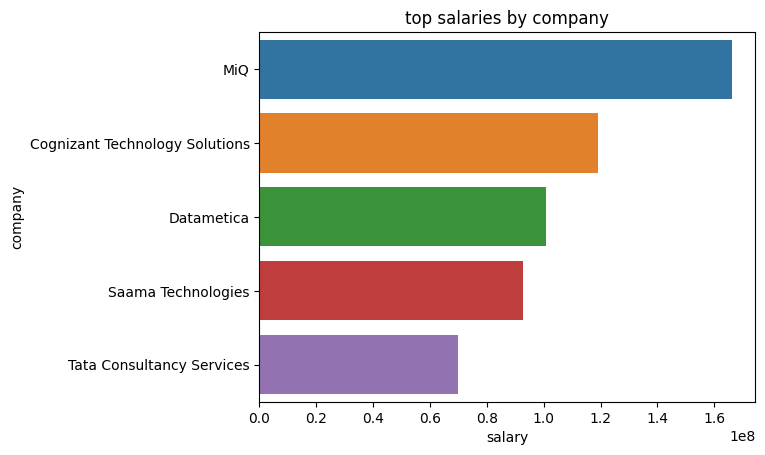

In [22]:
plt.title('top salaries by company')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=q,)
plt.show()

In [23]:
d_a=d[d["job"]=="Data Analyst"]
d_a

,index,company,job,area,salary
1954,1954,Accenture,Data Analyst,Bangalore,608077.0
1955,1955,Tata Consultancy Services,Data Analyst,Bangalore,483697.0
1956,1956,Mu Sigma,Data Analyst,Bangalore,610598.0
1957,1957,Amazon,Data Analyst,Bangalore,670610.0
1958,1958,Myntra,Data Analyst,Bangalore,1004884.0
...,...,...,...,...,...
2937,2938,Edelweiss Tokio Life Insurance,Data Analyst,Mumbai,395292.0
2938,2939,Capital One,Data Analyst,Mumbai,405528.0
2939,2940,Nine A Business Connect,Data Analyst,Mumbai,419172.0
2940,2941,Hans Infotech,Data Analyst,Mumbai,64488.0


In [24]:
# we have checked the data analyst job profiles
print(max(d_a["salary"]))
# maximum salary reported is 39009618.6 for data analyst
print(min(d_a["salary"]))

39009618.6
10814.0


In [25]:
d_a[d_a["salary"]==39009618.6][["job","company","salary"]]

,job,company,salary
2485,Data Analyst,Genpact,39009618.6


In [26]:
d_a[d_a["salary"]==10814.0][["job","company","salary"]]

,job,company,salary
2470,Data Analyst,Orbit Technologies,10814.0


In [28]:
sort_des=d_a.sort_values(by="salary",ascending=False)
sort_des[0:20].head()

,index,company,job,area,salary
2485,2486,Genpact,Data Analyst,Hyderabad,39009618.60
2282,2283,EBC,Data Analyst,Pune,6431966.12
2516,2517,Nassau Re,Data Analyst,Hyderabad,3773676.00
2502,2503,Enrich IBS,Data Analyst,Hyderabad,3773676.00
2446,2447,First Student,Data Analyst,Hyderabad,2821536.00


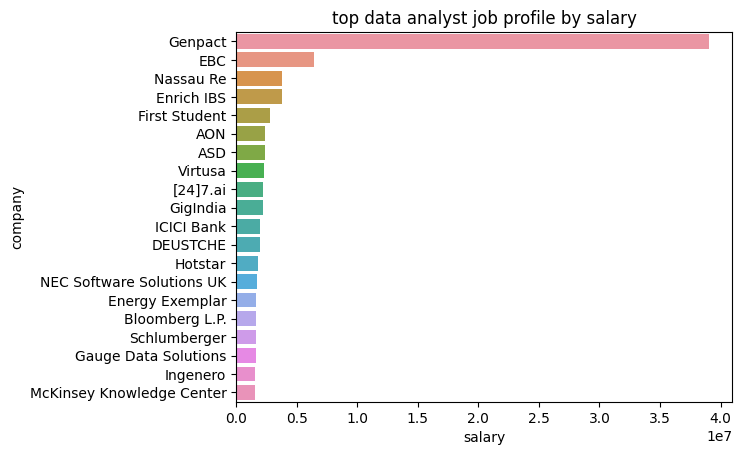

In [29]:
plt.title('top data analyst job profile by salary')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=sort_des[0:20])
plt.show()

In [30]:
d_s=d[d["job"]=="Data Scientist"]
d_s.head()

,index,company,job,area,salary
0,0,Mu Sigma,Data Scientist,Bangalore,648573.0
1,1,IBM,Data Scientist,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,Bangalore,669578.0
4,4,Accenture,Data Scientist,Bangalore,944110.0


In [31]:

print(max(d_s["salary"]))

print(min(d_s["salary"]))

166140358.4
48000.0


In [32]:
d_s[d_s["salary"]==166140358.4][["job","company","salary"]]

,job,company,salary
585,Data Scientist,MiQ,166140358.4


In [33]:
d_s[d_s["salary"]==48000.0][["job","company","salary"]]

,job,company,salary
581,Data Scientist,Coursera,48000.0
1892,Data Scientist,Unacademy,48000.0


In [35]:
sort_desc1=d_s.sort_values(by="salary",ascending=False)
sort_desc1[0:20].head()

,index,company,job,area,salary
585,585,MiQ,Data Scientist,Bangalore,1.661404e+08
1115,1115,Saama Technologies,Data Scientist,Pune,9.273781e+07
1054,1054,Tata Consultancy Services,Data Scientist,Pune,6.977996e+07
1865,1865,DONE by NONE,Data Scientist,Mumbai,4.589844e+07
1869,1869,Bharti Airtel,Data Scientist,Mumbai,4.589821e+07


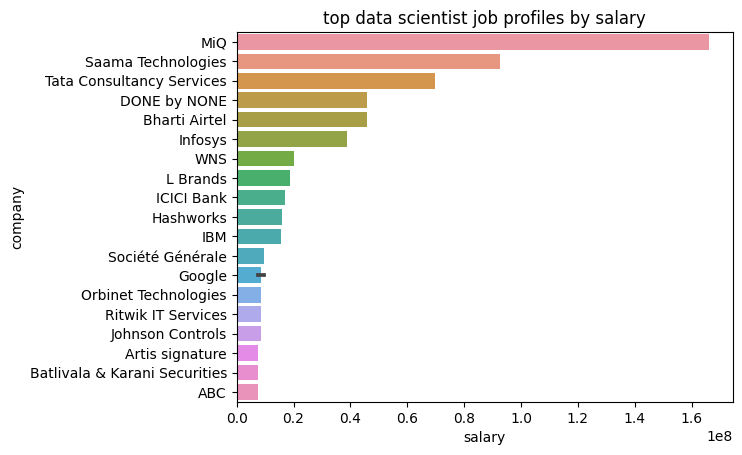

In [36]:
plt.title('top data scientist job profiles by salary')
plt.xlabel('company')
plt.ylabel('salary')
sns.barplot(y="company",x="salary",data=sort_desc1[0:20])
plt.show()

In [38]:
# tcs,amazon,accenture,gooogle,ibm are the top companies having maximum job in data science respectively
d["company"].value_counts()

Tata Consultancy Services     41
Amazon                        31
Accenture                     30
Google                        27
IBM                           26
                              ..
URS Technologies Solutions     1
Aniket Sonawane                1
Brahman bhetun                 1
Airavaat Car Rentals           1
Market Pulse Technologies      1
Name: company, Length: 2528, dtype: int64

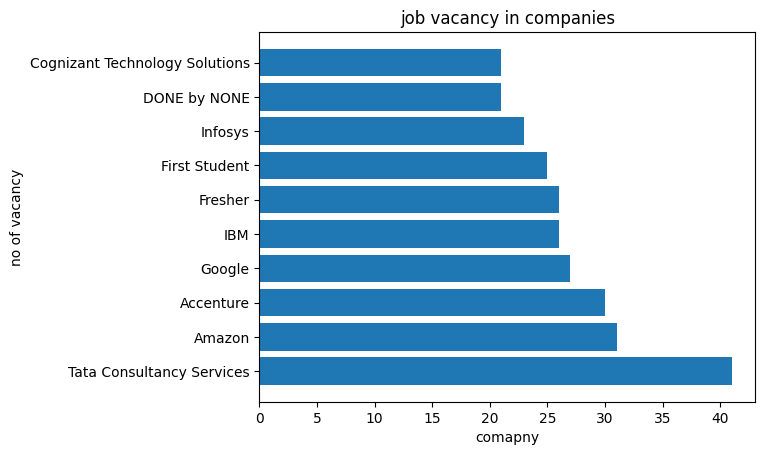

In [39]:
plt.title('job vacancy in companies')
plt.xlabel('comapny')
plt.ylabel('no of vacancy')
plt.barh(list(d["company"].value_counts().keys()[0:10]),list(d["company"].value_counts()[0:10]))
plt.show()

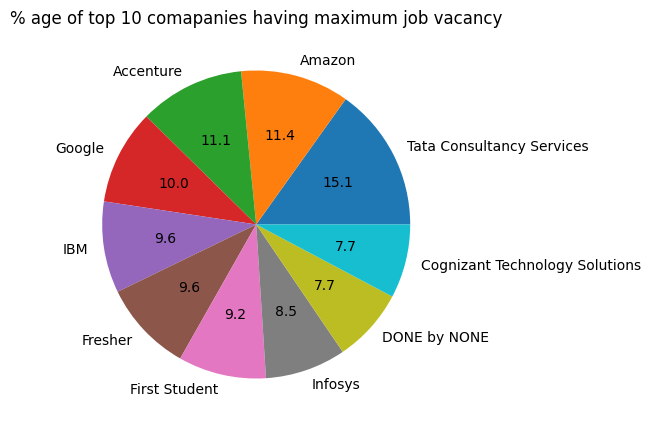

In [40]:
plt.figure(figsize=(10,5))
plt.title('% age of top 10 comapanies having maximum job vacancy')
plt.pie(list(d["company"].value_counts()[0:10]),labels=list(d["company"].value_counts().keys()[0:10]),autopct="%0.1f")
plt.show()

In [41]:
d["area"].value_counts()

Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: area, dtype: int64

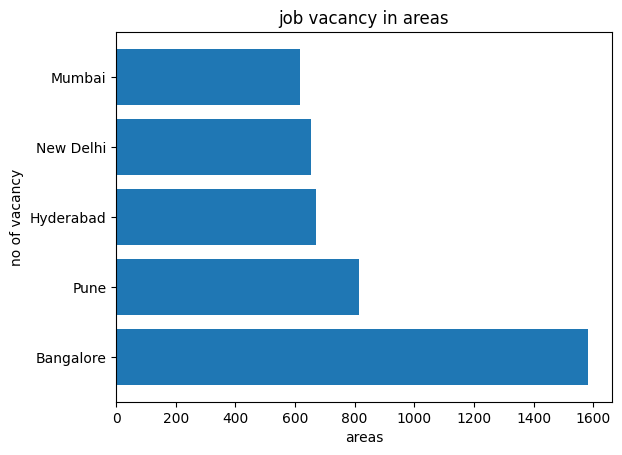

In [42]:
plt.title('job vacancy in areas')
plt.xlabel('areas')
plt.ylabel('no of vacancy')
plt.barh(list(d["area"].value_counts().keys()),list(d["area"].value_counts()))
plt.show()

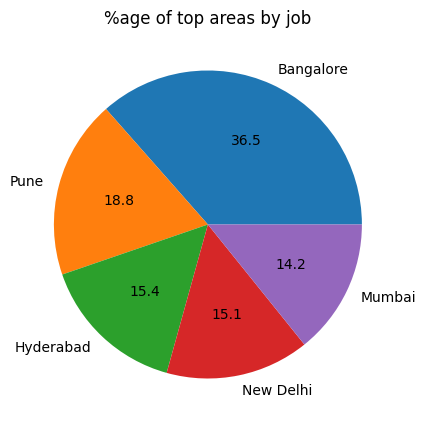

In [43]:
plt.figure(figsize=(10,5))
plt.title('%age of top areas by job')
plt.pie(list(d["area"].value_counts()),labels=list(d["area"].value_counts().keys()),autopct="%0.1f")
plt.show()

In [44]:
d["job"].value_counts()

Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

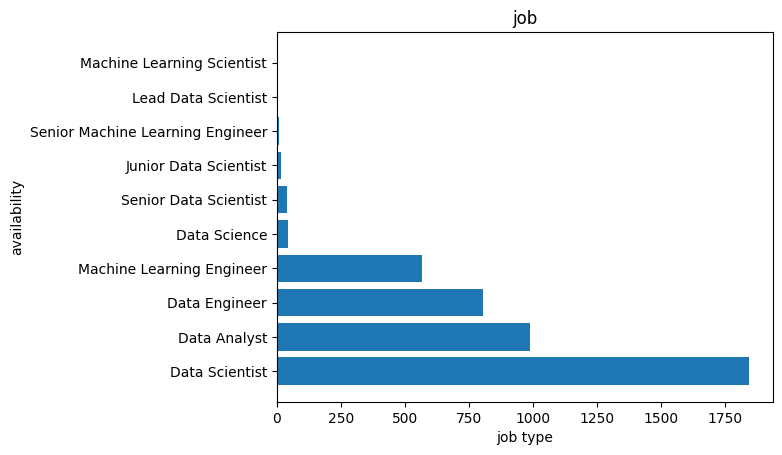

In [45]:
plt.barh(list(d["job"].value_counts().keys()[0:10]),list(d["job"].value_counts()[0:10]))
plt.xlabel("job type")
plt.ylabel("availability")
plt.title("job")
plt.show()

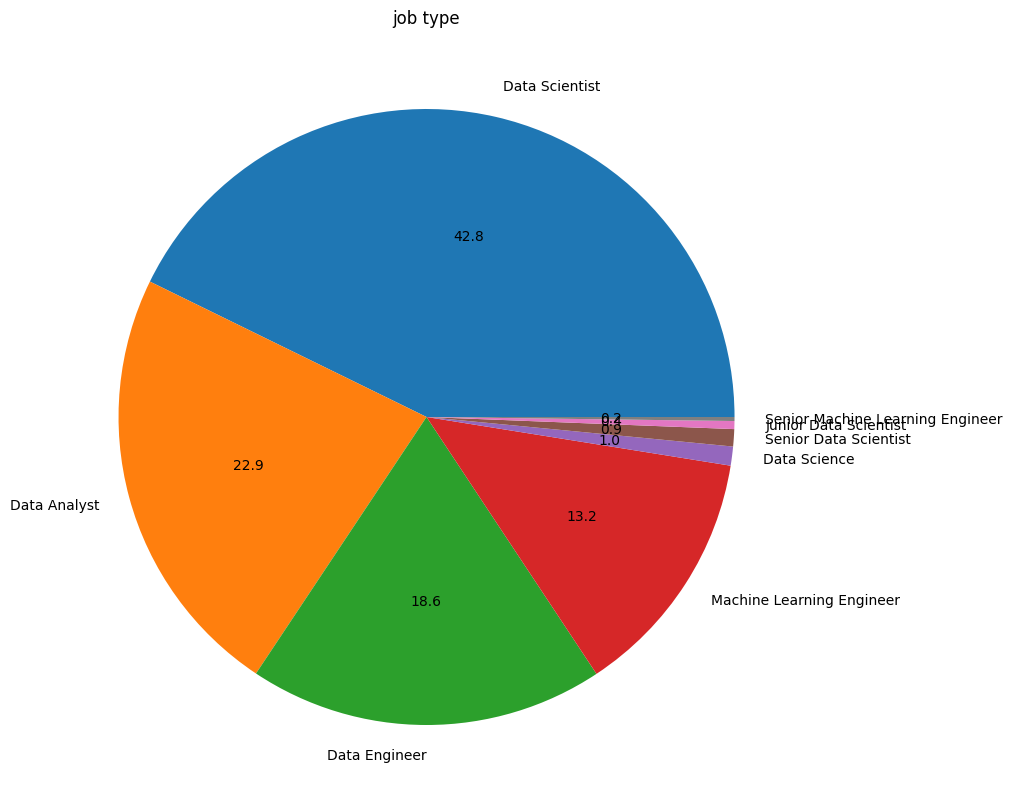

In [46]:
plt.figure(figsize=(15,10))
plt.pie(list(d["job"].value_counts()[0:8]),labels=list(d["job"].value_counts().keys()[0:8]),autopct="%0.1f")
plt.title("job type")
plt.show()

In [47]:
tcs=d[d["company"]=="Tata Consultancy Services"]
tcs.head()

,index,company,job,area,salary
2,2,Tata Consultancy Services,Data Scientist,Bangalore,836874.0
272,272,Tata Consultancy Services,Data Scientist,Bangalore,1427832.0
944,944,Tata Consultancy Services,Data Scientist,Bangalore,374688.0
985,985,Tata Consultancy Services,Data Scientist,Pune,717331.0
1053,1053,Tata Consultancy Services,Data Scientist,Pune,300000.0


In [48]:
tcs["job"].value_counts()
# in tcs company data scientist,data analyst,data engineer are top profile

Data Scientist               13
Data Analyst                  9
Data Engineer                 9
Machine Learning Engineer     6
Senior Data Scientist         2
Data Science                  1
Junior Data Scientist         1
Name: job, dtype: int64

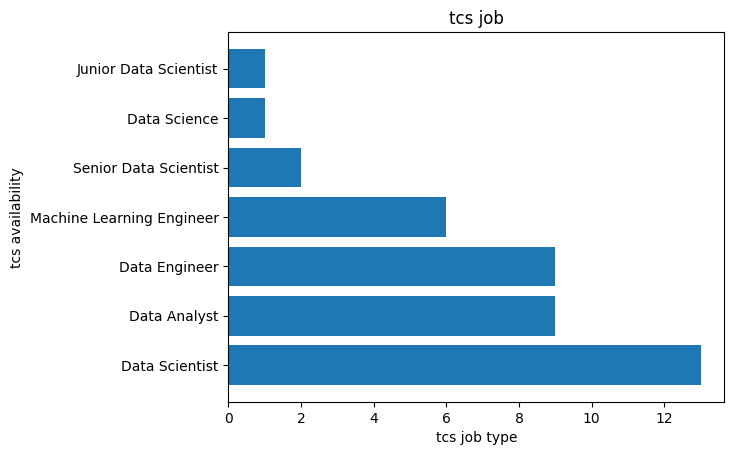

In [49]:
plt.barh(list(tcs["job"].value_counts().keys()),list(tcs["job"].value_counts()))
plt.xlabel("tcs job type")
plt.ylabel("tcs availability")
plt.title("tcs job")
plt.show()

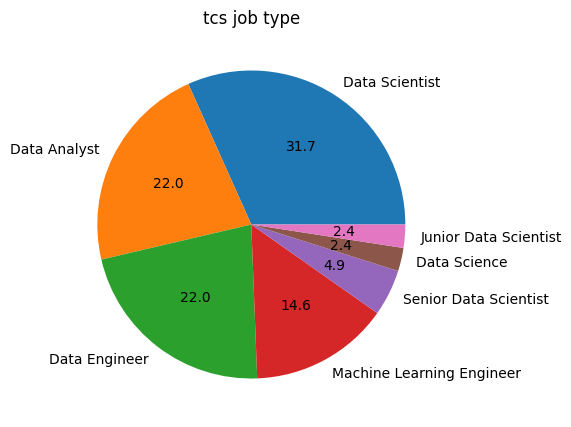

In [52]:
plt.figure(figsize=(10,5))
plt.pie(list(tcs["job"].value_counts()),labels=list(tcs["job"].value_counts().keys()),autopct="%0.1f")
plt.title("tcs job type")
plt.show()
# by pie chart we have tried to count the %age of top job profiles in tcs


In [53]:
tcs_des=tcs.sort_values(by="salary",ascending=False)
tcs_des[0:5].head()

,index,company,job,area,salary
1054,1054,Tata Consultancy Services,Data Scientist,Pune,69779958.4
1262,1262,Tata Consultancy Services,Senior Data Scientist,Pune,2092324.0
272,272,Tata Consultancy Services,Data Scientist,Bangalore,1427832.0
3116,3117,Tata Consultancy Services,Data Engineer,Bangalore,1210776.0
1520,1520,Tata Consultancy Services,Data Scientist,Hyderabad,1208801.0


In [56]:
tcs["area"].value_counts()
# pune,mumbai are location where tcs have max data science job vacancy

Pune         10
Mumbai        9
Bangalore     8
Hyderabad     8
New Delhi     6
Name: area, dtype: int64

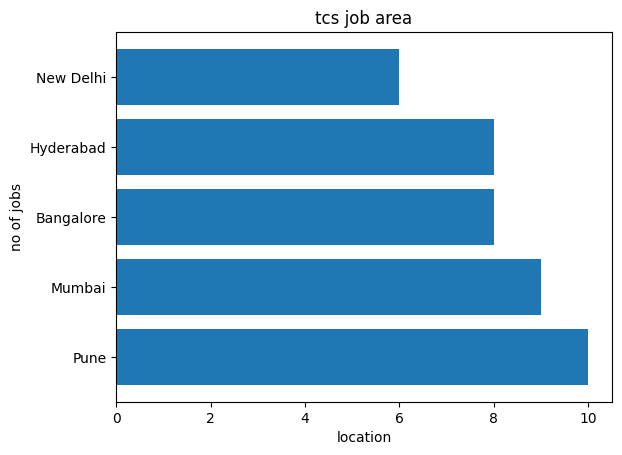

In [57]:
plt.barh(list(tcs["area"].value_counts().keys()),list(tcs["area"].value_counts()))
plt.title("tcs job area")
plt.xlabel("location")
plt.ylabel("no of jobs")
plt.show()

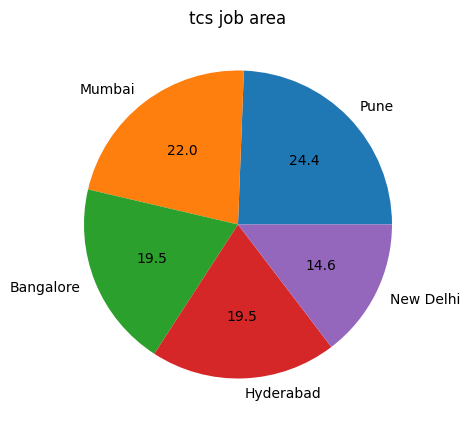

In [58]:
plt.figure(figsize=(10,5))
plt.pie(list(tcs["area"].value_counts()),labels=list(tcs["area"].value_counts().keys()),autopct="%0.1f")
plt.title("tcs job area")
plt.show()

In [60]:
g=df[df["company"]=="Google"]
g.head()

,index,company,job,salary report,area,salary
12,12,Google,Data Scientist,19,Bangalore,1558095.0
631,631,Google,Data Scientist,1,Bangalore,5000000.0
912,912,Google,Data Scientist,1,Bangalore,480000.0
1064,1064,Google,Data Scientist,1,Pune,7571032.0
1390,1390,Google,Data Scientist,4,Hyderabad,1121437.0


In [62]:
g_des=g.sort_values(by="salary",ascending=False)
g_des[0:5].head()

,index,company,job,salary report,area,salary
1859,1859,Google,Data Scientist,1,Mumbai,9449517.96
1064,1064,Google,Data Scientist,1,Pune,7571032.00
631,631,Google,Data Scientist,1,Bangalore,5000000.00
3958,3960,Google,Machine Learning Engineer,1,Pune,2480112.00
3441,3443,Google,Data Engineer,1,Hyderabad,2239808.00


In [63]:
g["area"].value_counts()

New Delhi    8
Bangalore    6
Hyderabad    6
Mumbai       5
Pune         2
Name: area, dtype: int64

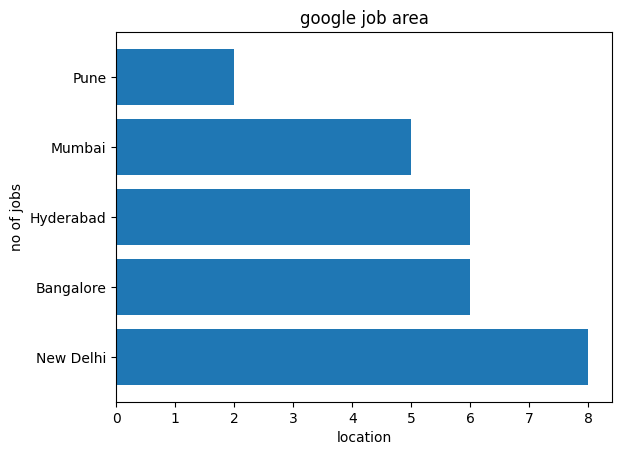

In [64]:
plt.barh(list(g["area"].value_counts().keys()),list(g["area"].value_counts()))
plt.title("google job area")
plt.xlabel("location")
plt.ylabel("no of jobs")
plt.show()

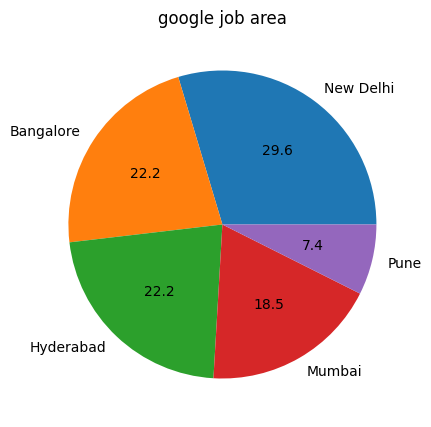

In [65]:
plt.figure(figsize=(10,5))
plt.pie(list(g["area"].value_counts()),labels=list(g["area"].value_counts().keys()),autopct="%0.1f")
plt.title("google job area")
plt.show()

In [66]:
g["job"].value_counts()
# in google company data scientist,data analyst,data engineer are top profiles

Data Scientist               12
Data Analyst                  6
Data Engineer                 5
Machine Learning Engineer     4
Name: job, dtype: int64

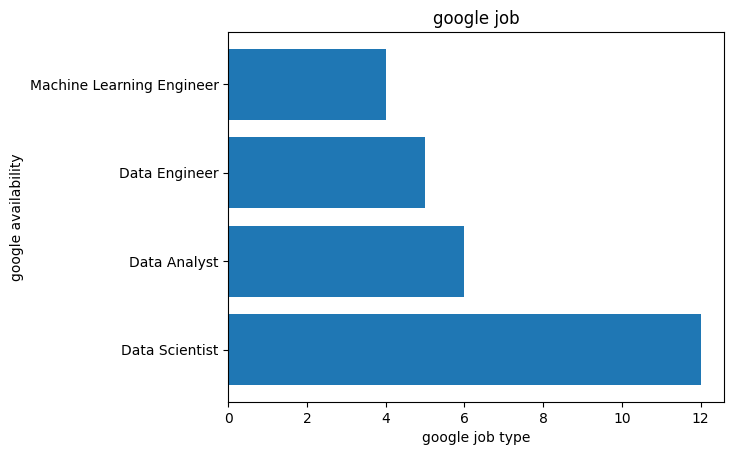

In [67]:
plt.barh(list(g["job"].value_counts().keys()),list(g["job"].value_counts()))
plt.xlabel("google job type")
plt.ylabel("google availability")
plt.title("google job")
plt.show()

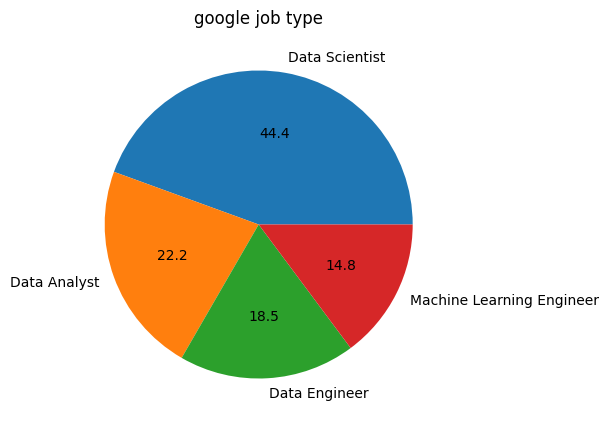

In [68]:
plt.figure(figsize=(10,5))
plt.pie(list(g["job"].value_counts()),labels=list(g["job"].value_counts().keys()),autopct="%0.1f")
plt.title("google job type")
plt.show()

In [70]:
ibm=df[df["company"]=="IBM"]
ibm.head()

,index,company,job,salary report,area,salary
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
95,95,IBM,Data Scientist,4,Bangalore,395436.0
646,646,IBM,Data Scientist,1,Bangalore,1203913.0
880,880,IBM,Data Scientist,1,Bangalore,502448.0
987,987,IBM,Data Scientist,11,Pune,1036536.0


In [71]:
ibm_des=ibm.sort_values(by="salary",ascending=False)
ibm_des[0:5].head()
# max salary was given to data scientist in ibm company

,index,company,job,salary report,area,salary
1846,1846,IBM,Data Scientist,1,Mumbai,15603847.44
646,646,IBM,Data Scientist,1,Bangalore,1203913.00
1786,1786,IBM,Data Scientist,3,Mumbai,1193120.00
1,1,IBM,Data Scientist,95,Bangalore,1191950.00
987,987,IBM,Data Scientist,11,Pune,1036536.00


In [72]:
ibm["area"].value_counts()

Bangalore    7
Pune         5
Hyderabad    5
Mumbai       5
New Delhi    4
Name: area, dtype: int64

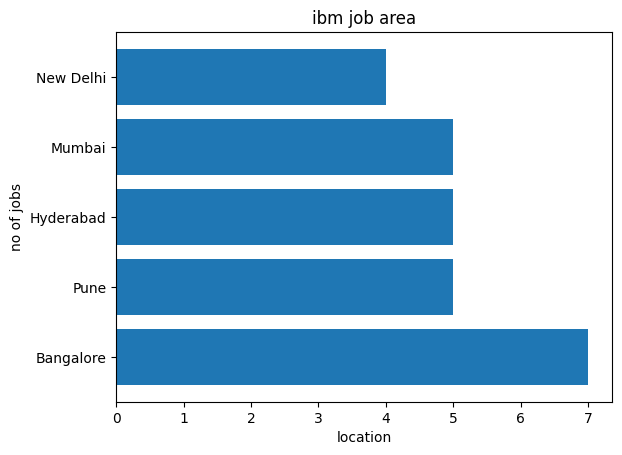

In [73]:
plt.barh(list(ibm["area"].value_counts().keys()),list(ibm["area"].value_counts()))
plt.title("ibm job area")
plt.xlabel("location")
plt.ylabel("no of jobs")
plt.show()

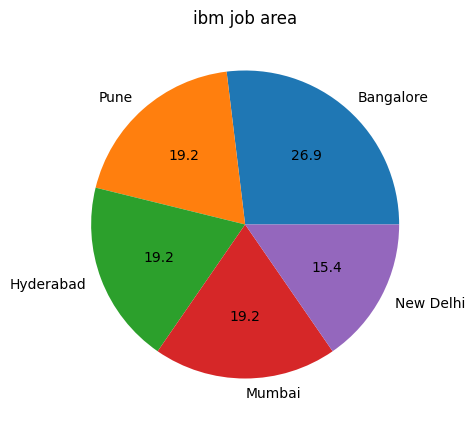

In [74]:
plt.figure(figsize=(10,5))
plt.pie(list(ibm["area"].value_counts()),labels=list(ibm["area"].value_counts().keys()),autopct="%0.1f")
plt.title("ibm job area")
plt.show()

In [75]:
ibm["job"].value_counts()

Data Scientist    11
Data Engineer      9
Data Analyst       6
Name: job, dtype: int64

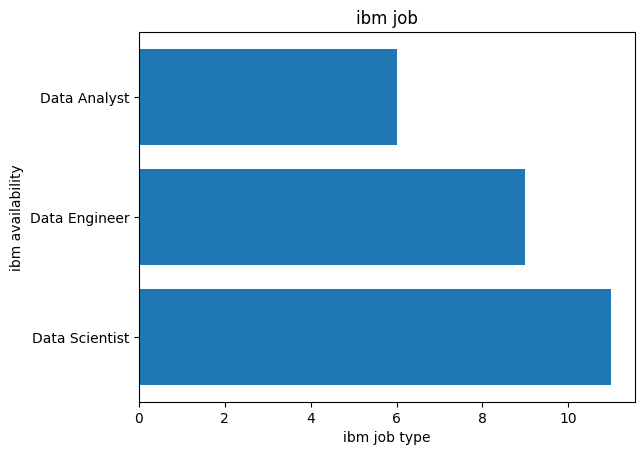

In [76]:
plt.barh(list(ibm["job"].value_counts().keys()),list(ibm["job"].value_counts()))
plt.xlabel("ibm job type")
plt.ylabel("ibm availability")
plt.title("ibm job")
plt.show()

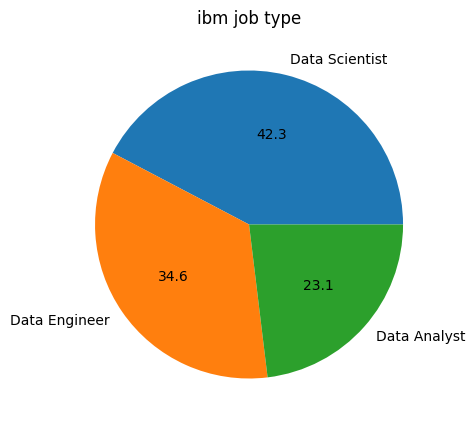

In [77]:
plt.figure(figsize=(10,5))
plt.pie(list(ibm["job"].value_counts()),labels=list(ibm["job"].value_counts().keys()),autopct="%0.1f")
plt.title("ibm job type")
plt.show()

In [78]:
acc=df[df["company"]=="Accenture"]
acc

,index,company,job,salary report,area,salary
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
273,273,Accenture,Data Scientist,2,Bangalore,715272.0
992,992,Accenture,Data Scientist,7,Pune,602937.0
1317,1317,Accenture,Senior Data Scientist,1,Pune,1076606.0
1362,1362,Accenture,Lead Data Scientist,1,Pune,2839138.0
1380,1380,Accenture,Data Scientist,7,Hyderabad,1104293.0
1456,1456,Accenture,Data Scientist,1,Hyderabad,122633.0
1566,1566,Accenture,Data Scientist,18,New Delhi,1196560.0
1609,1609,Accenture,Data Scientist,3,New Delhi,406548.0
1761,1761,Accenture,Data Scientist,10,Mumbai,900000.0


In [79]:
acc_des=acc.sort_values(by="salary",ascending=False)
acc_des[0:5]

,index,company,job,salary report,area,salary
1362,1362,Accenture,Lead Data Scientist,1,Pune,2839138.0
1566,1566,Accenture,Data Scientist,18,New Delhi,1196560.0
4030,4034,Accenture,Machine Learning Engineer,3,Hyderabad,1154890.0
1380,1380,Accenture,Data Scientist,7,Hyderabad,1104293.0
1317,1317,Accenture,Senior Data Scientist,1,Pune,1076606.0


In [80]:
acc["area"].value_counts()

Bangalore    8
Pune         8
Hyderabad    5
Mumbai       5
New Delhi    4
Name: area, dtype: int64

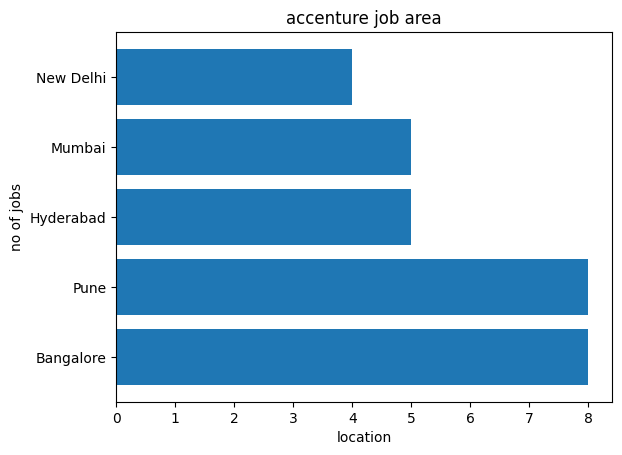

In [81]:
plt.barh(list(acc["area"].value_counts().keys()),list(acc["area"].value_counts()))
plt.title("accenture job area")
plt.xlabel("location")
plt.ylabel("no of jobs")
plt.show()

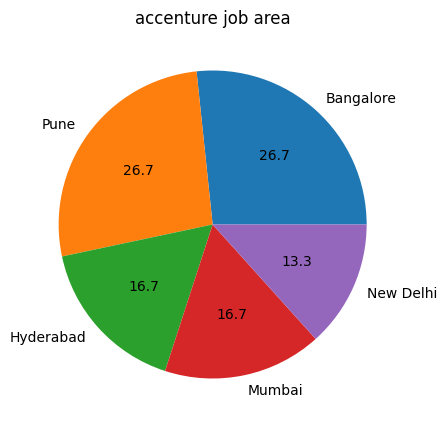

In [82]:
plt.figure(figsize=(10,5))
plt.pie(list(acc["area"].value_counts()),labels=list(acc["area"].value_counts().keys()),autopct="%0.1f")
plt.title("accenture job area")
plt.show()

In [83]:
acc["job"].value_counts()

Data Scientist               9
Data Analyst                 8
Data Engineer                6
Machine Learning Engineer    5
Senior Data Scientist        1
Lead Data Scientist          1
Name: job, dtype: int64

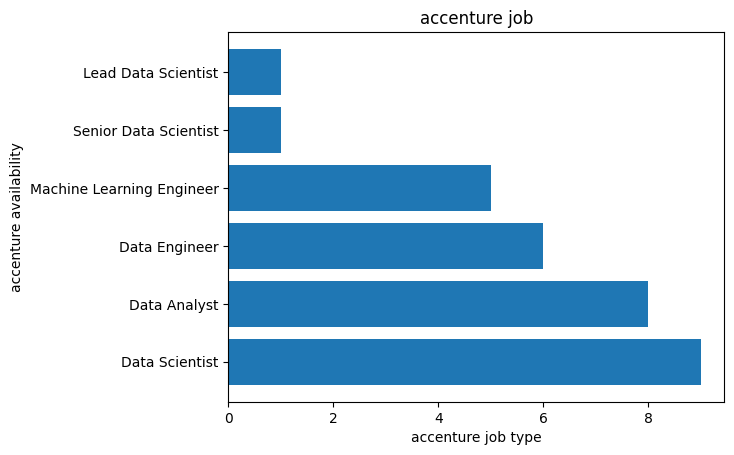

In [84]:
plt.barh(list(acc["job"].value_counts().keys()),list(acc["job"].value_counts()))
plt.xlabel("accenture job type")
plt.ylabel("accenture availability")
plt.title("accenture job")
plt.show()

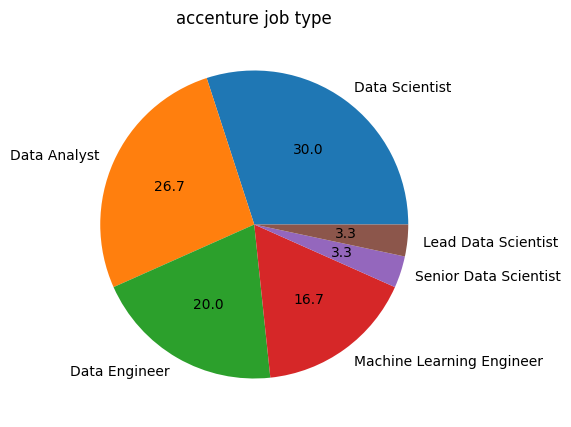

In [85]:
plt.figure(figsize=(10,5))
plt.pie(list(acc["job"].value_counts()),labels=list(acc["job"].value_counts().keys()),autopct="%0.1f")
plt.title("accenture job type")
plt.show()